In [ ]:
%%sh
curl https://packages.microsoft.com/keys/microsoft.asc | apt-key add -
curl https://packages.microsoft.com/config/ubuntu/16.04/prod.list > /etc/apt/sources.list.d/mssql-release.list
sudo apt-get update
sudo ACCEPT_EULA=Y apt-get -q -y install msodbcsql17
sudo apt-get install unixodbc-dev
pip install pyodbc
pip install chart_studio

OK
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://packages.microsoft.com/ubuntu/16.04/prod xenial InRelease [4,002 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:6 https://packages.microsoft.com/ubuntu/16.04/prod xenial/main amd64 Packages [240 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:12 http://archiv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   983  100   983    0     0   8622      0 --:--:-- --:--:-- --:--:--  8699
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    79  100    79    0     0   2633      0 --:--:-- --:--:-- --:--:--  2633
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 6.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


In [ ]:
!pip install pyemma

     |████████████████████████████████| 1.6 MB 28.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 603 kB 43.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached deeptime-0.2.9-cp37-cp37m-linux_x86_64.whl
  Using cached mdtraj-1.9.6-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (6.2 MB)
     |████████████████████████████████| 81 kB 10.6 MB/s 
     |████████████████████████████████| 318 kB 64.6 MB/s 
  Using cached threadpoolctl-2.2.0-py3-none-any.whl (12 kB)
     |████████████████████████████████| 65 kB 4.2 MB/s 
  Created wheel for pyemma: filename=pyEMMA-2.5.9-cp37-cp37m-linux_x86_64.whl size=2498751 sha256=bb7d0660ece077d2a0f13e3742ff20ed8fde2283f5851fe23f5f6ee40353f73a
  Stored in directory: /root/.cache/pip/wheels/6a/30/8f/13aef118741687585d497f8b57e2c5e0b

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.dates as md
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from pyemma import msm
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from mpl_toolkits.mplot3d import Axes3D
from pyemma import msm
%matplotlib inline

In [ ]:
import pyodbc 
server = '13.211.197.103' 
database = 'temp_PMEData_subset' 
username = 'SA' 
password = '@#DT@LP911' 
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

In [ ]:
sql_powermeter = "select * from dbo.Query where SourceName = 'WP_SF_MVPS4.PM1'"
df_power = pd.read_sql(sql_powermeter, cnxn)

sql_weatherstation = "select * from dbo.Query where SourceName = 'WP_SF_MVPS4.WS1'"
df_weather = pd.read_sql(sql_weatherstation, cnxn)

In [ ]:
rslt_power = df_power[df_power['MeasurementName'] == 'Active Power']
df_final_activepower = rslt_power.resample('d', on='TimestampUTC').mean().dropna(how='all')
df_final_activepower.rename(columns={'Value':'activepower'}, inplace=True)

rslt_irradiance = df_weather[df_weather['MeasurementName'] == 'Irradiance Global (W/m^2)']
df_final_irradiance = rslt_irradiance.resample('d', on='TimestampUTC').mean().dropna(how='all')
df_final_irradiance.rename(columns={'Value':'irradiance'}, inplace=True)

rslt_rainfall = df_weather[df_weather['MeasurementName'] == 'Rainfall (mm)']
df_final_rainfall = rslt_rainfall.resample('d', on='TimestampUTC').mean().dropna(how='all')
df_final_rainfall.rename(columns={'Value':'rainfall'}, inplace=True)

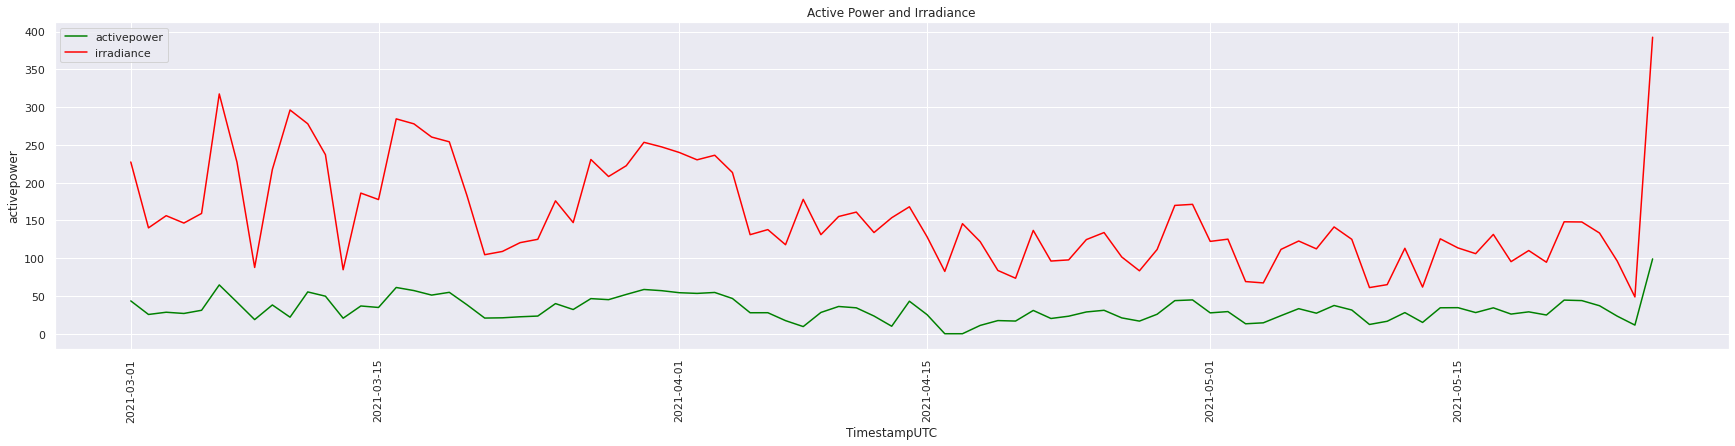

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(30,6)})

sns.lineplot(x="TimestampUTC", y="activepower", data=df_final_activepower, label="activepower", color = "green")
sns.lineplot(x="TimestampUTC", y="irradiance", data=df_final_irradiance, label="irradiance", color = "red")
plt.xticks(rotation=90)
plt.title('Active Power and Irradiance')
plt.show()

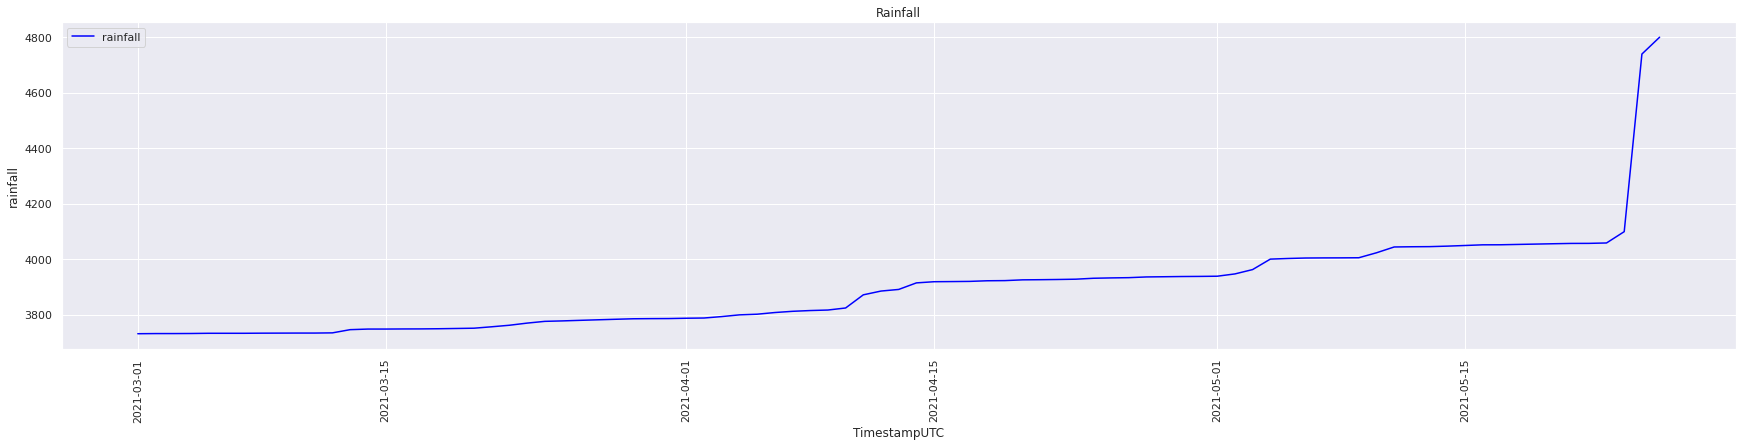

In [ ]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(30,6)})

sns.lineplot(x="TimestampUTC", y="rainfall", data=df_final_rainfall, label="rainfall", color = "blue")
plt.xticks(rotation=90)
plt.title('Rainfall')
plt.show()

In [ ]:
df_timestamp = pd.DataFrame(data=rslt_power['TimestampUTC'].dt.date.unique())
df_timestamp.rename(columns={0:'date'}, inplace=True)
df_timestamp.head()

,date
0,2021-03-01
1,2021-03-02
2,2021-03-03
3,2021-03-04
4,2021-03-05


In [ ]:
df_timestamp.reset_index(drop=True, inplace=True)
df_final_activepower.reset_index(drop=True, inplace=True)
df_final_irradiance.reset_index(drop=True, inplace=True)
df_final_rainfall.reset_index(drop=True, inplace=True)

final_data = pd.concat([df_timestamp,df_final_activepower,df_final_irradiance,df_final_rainfall],join='outer', axis=1)
final_data.head()

,date,activepower,irradiance,rainfall
0,2021-03-01,43.436184,227.419355,3730.825806
1,2021-03-02,25.492922,140.189474,3731.372043
2,2021-03-03,28.450577,156.315789,3731.400000
3,2021-03-04,26.823645,146.542553,3731.645652
4,2021-03-05,31.050348,159.294737,3732.400000


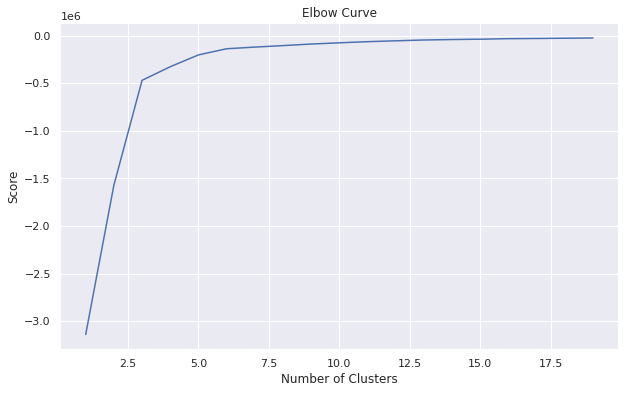

In [ ]:
data = final_data[['activepower', 'irradiance', 'rainfall']]
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

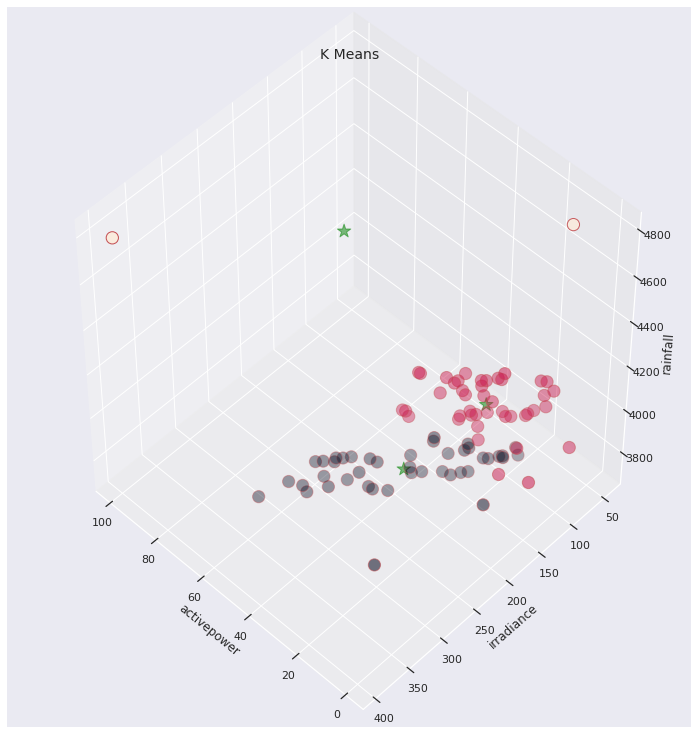

In [ ]:
X = final_data[['activepower', 'irradiance', 'rainfall']]
X = X.reset_index(drop=True)
km = KMeans(n_clusters=3)
km.fit(X)
km.predict(X)
labels = km.labels_
centers = km.cluster_centers_
#Plotting
fig = plt.figure(1, figsize=(10,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2],
          c=labels.astype(np.float), edgecolor="r", s=150)

ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='green', s=200, alpha=0.5, marker='*');

ax.set_xlabel("activepower")
ax.set_ylabel("irradiance")
ax.set_zlabel("rainfall")
plt.title("K Means", fontsize=14);

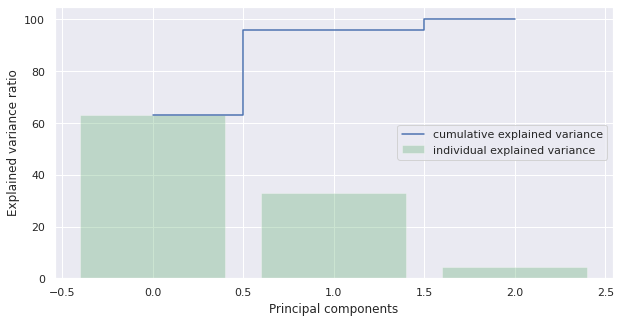

In [ ]:
data = final_data[['activepower', 'irradiance', 'rainfall']]
X = data.values
X_std = StandardScaler().fit_transform(X)
#Calculating Eigenvecors and eigenvalues of Covariance matrix
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

In [ ]:
# Take useful feature and standardize them
data = final_data[['activepower', 'irradiance', 'rainfall']]
X_std = StandardScaler().fit_transform(X)
data = pd.DataFrame(X_std)
# reduce to 2 important features
pca = PCA(n_components=2)
data = pca.fit_transform(data)
# standardize these 2 new features
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

In [ ]:
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
final_data['cluster'] = kmeans[2].predict(data)
final_data.index = data.index
final_data['principal_feature1'] = data[0]
final_data['principal_feature2'] = data[1]
final_data['cluster'].value_counts()

1    57
0    28
2     2
Name: cluster, dtype: int64

In [ ]:
final_data.head()

,date,activepower,irradiance,rainfall,cluster,principal_feature1,principal_feature2
0,2021-03-01,43.436184,227.419355,3730.825806,0,1.050553,-0.668357
1,2021-03-02,25.492922,140.189474,3731.372043,1,-0.173351,-1.028722
2,2021-03-03,28.450577,156.315789,3731.400000,1,0.041686,-0.967912
3,2021-03-04,26.823645,146.542553,3731.645652,1,-0.083761,-1.000335
4,2021-03-05,31.050348,159.294737,3732.400000,0,0.143951,-0.914050


In [ ]:
# return Series of distance between each point and its distance with the closest centroid
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.at[i] = np.linalg.norm(Xa-Xb)
    return distance

outliers_threshold = 0.05
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(data, kmeans[2])
number_of_outliers = int(outliers_threshold*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
final_data['anomaly1'] = (distance >= threshold).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


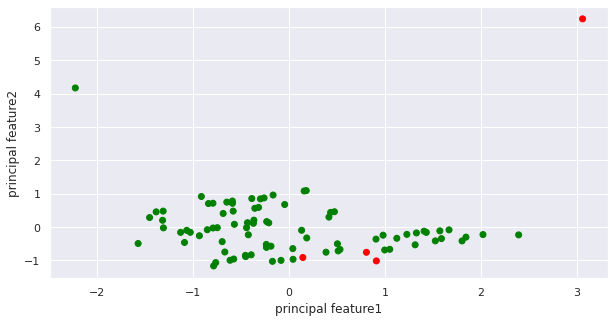

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
colors = {0:'green', 1:'red'}
ax.scatter(final_data['principal_feature1'], final_data['principal_feature2'], c=final_data["anomaly1"].apply(lambda x: colors[x]))
plt.xlabel('principal feature1')
plt.ylabel('principal feature2')
plt.show();

In [ ]:
final_data.anomaly1.value_counts()

0    83
1     4
Name: anomaly1, dtype: int64

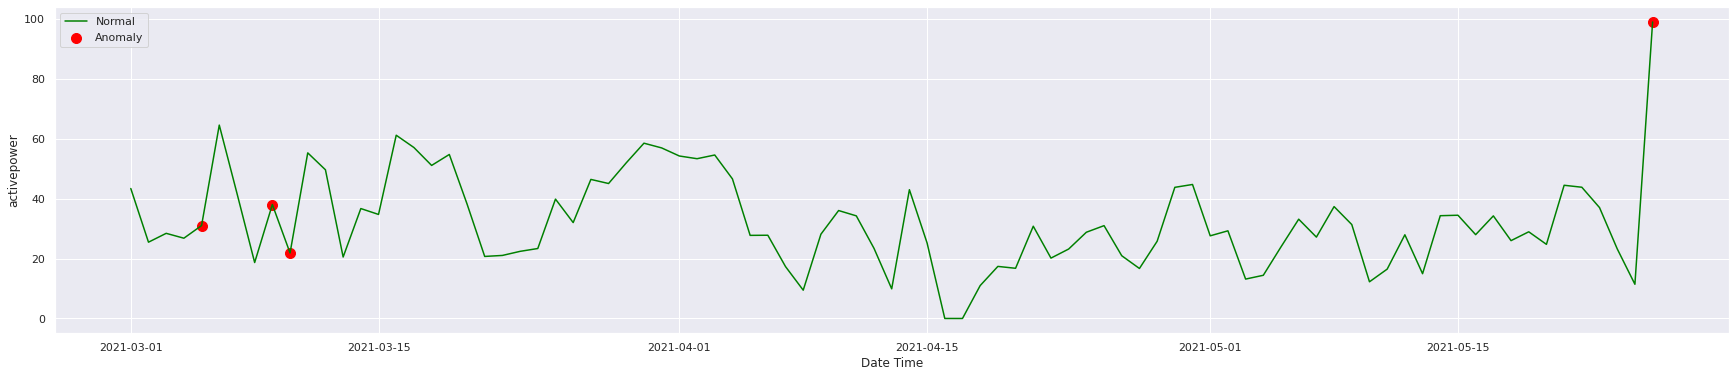

In [ ]:
df = final_data
fig, ax = plt.subplots(figsize=(30,6))

a = df.loc[df['anomaly1'] == 1, ['date', 'activepower']] #anomaly

ax.plot(df['date'], df['activepower'], color='green', label='Normal')
ax.scatter(a['date'],a['activepower'], color='red', label='Anomaly', s = 100)
plt.xlabel('Date Time')
plt.ylabel('activepower')
plt.legend()
plt.show();

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


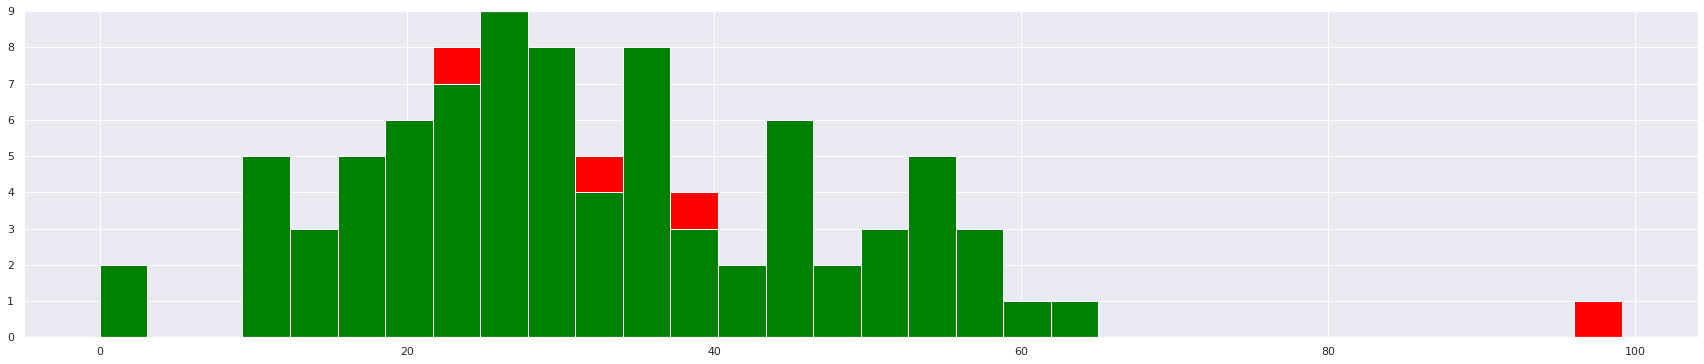

In [ ]:
a = final_data.loc[final_data['anomaly1'] == 0, 'activepower']
b = final_data.loc[final_data['anomaly1'] == 1, 'activepower']

fig, axs = plt.subplots(figsize=(30,6))
axs.hist([a,b], bins=32, stacked=True, color=['green', 'red'])
plt.show();